# **Clustering Bank Customers using Pycaret**
### By Aqilah, Genta, and Fadly

Data Source : https://www.kaggle.com/roshansharma/mall-customers-clustering-analysis/data?select=Mall_Customers.csv



Input variables:<br><br>
**Bank client data**: <br>
1 - age (numeric)<br>
2 - gender : gender of the customer (categorical: 'male','female')<br>
3 - annual income (numeric)<br>
4 - spending score: Score assigned by the mall based on customer behavior and spending nature (numeric)<br>


In [ ]:
import pandas as pd
data = pd.read_csv('Mall_Customers.csv')

In [ ]:
!pip install pycaret

     |████████████████████████████████| 288 kB 27.4 MB/s 
     |████████████████████████████████| 16.9 MB 42.8 MB/s 
     |████████████████████████████████| 261 kB 54.0 MB/s 
     |████████████████████████████████| 113 kB 59.4 MB/s 
     |████████████████████████████████| 1.7 MB 35.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 2.0 MB 26.2 MB/s 
     |████████████████████████████████| 86 kB 5.6 MB/s 
     |████████████████████████████████| 1.3 MB 36.4 MB/s 
     |████████████████████████████████| 56 kB 4.9 MB/s 
     |████████████████████████████████| 6.8 MB 46.5 MB/s 
     |████████████████████████████████| 167 kB 58.0 MB/s 
     |████████████████████████████████| 675 kB 50.3 MB/s 
     |████████████████████████████████| 62 kB 779 kB/s 
     |████████████████████████████████| 102 kB 9.5 MB/s 
     |███████████████████

# **Data Preprocessing**

Field yang bersifat kategorikal kita sesuaikan sesuai dengan format datanya.

In [ ]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
data['Gender'] = data['Gender'].astype('category')
data['Gender'] = data['Gender'].cat.reorder_categories(['Female','Male'])
data['Gender'] = data['Gender'].cat.codes

In [ ]:
data.shape

(200, 5)

In [ ]:
data_model = data.sample(frac=0.95, random_state=786)
data_unseen = data.drop(data_model.index)
data_model.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(data_model.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))


Data for Modeling: (190, 5)
Unseen Data For Predictions: (10, 5)


#**Modelling**

Melakukan proses percobaan terhadap model-model clustering.
Seed didefinisikan di config supaya hasilnya dapat diulang (reproducible).
Sebelum melakukan clustering, dilakukan normalisasi data dengan metode zscore.
Kemudian variabel 'CustomerID' diabaikan karena tidak digunakan untuk clustering.


In [ ]:
from pycaret.clustering import *

In [ ]:

exp_clu101 = setup(data, normalize = True, 
                   ignore_features = ['CustomerID'],
                   session_id = 123)

,Description,Value
0,session_id,123
1,Original Data,"(200, 5)"
2,Missing Values,False
3,Numeric Features,4
4,Categorical Features,0
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(200, 4)"
9,CPU Jobs,-1


In [ ]:
set_config('seed', 45)

## Create Model

In [ ]:
kmeans = create_model('kmeans',num_clusters = 3)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3143,87.1942,1.1699,0,0,0




1.   Silhouette - mendekati 1 >>
2.   Calinski semakin besar semakin baus
3.   Davies Semakin kecil semakin bagus




In [ ]:
kmodes = create_model('kmodes',num_clusters = 3)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,-0.0218,8.0269,3.9648,0,0,0


In [ ]:
models()

,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch
kmodes,K-Modes Clustering,kmodes.kmodes.KModes


In [ ]:
meanshift_model = create_model('meanshift',num_clusters = 3)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0,0,0,0,0,0


In [ ]:
sc_model  = create_model('sc',num_clusters = 3)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3095,85.8159,1.114,0,0,0


In [ ]:
dbscan_model = create_model('dbscan',num_clusters= 3)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,-0.0114,10.8906,1.5008,0,0,0


In [ ]:
optics_model = create_model('optics',num_clusters= 3)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0468,15.7565,1.752,0,0,0


In [ ]:
hclust_model  = create_model('hclust',num_clusters = 3)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3097,83.445,1.1808,0,0,0


In [ ]:
birch_model = create_model('birch',num_clusters= 3)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2334,56.7163,1.1873,0,0,0


Model terbaik berdasarkan komparasi score Silhouette, Calinski-Harabasz,dan Davies-Bouldin adalah Kmeans. Kemudian akan dilanjutkan dengan melakukan improvement terhadap model tersebut.





In [ ]:
plot_model(kmeans)

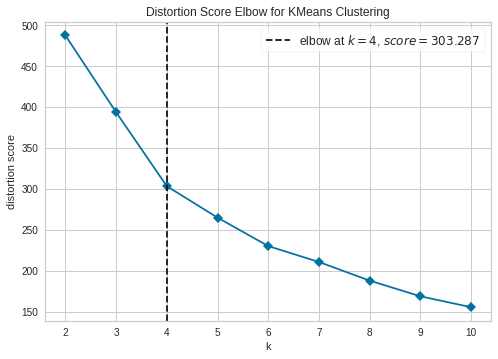

In [ ]:
plot_model(kmeans, plot = 'elbow')

Berdasakan elbow method, kmeans terbaik adalah menggunakan 4 cluster, sehingga akan di run ulang.

In [ ]:
kmeans2 = create_model('kmeans', num_clusters= 4)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3503,101.4873,1.065,0,0,0


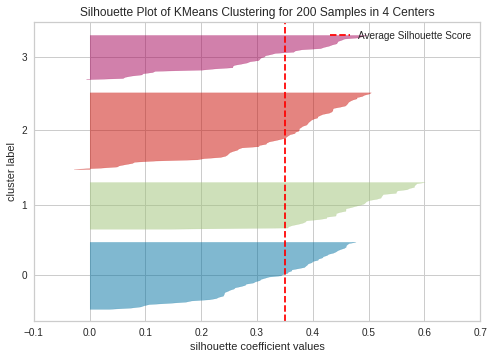

In [ ]:
plot_model(kmeans2, plot = 'silhouette')

Silhouette plot diatas menunjukkan bahwa setiap cluster K-Means memiliki score Silhouette diatas Average Silhouette Score. Selain itu, setiap plot dari cluster memiliki ukuran yang serupa. Sehingga dapat dikatakan bahwa cluster terbaik untuk model K-Means adalah 4.

In [ ]:
plot_model(kmeans2, plot = 'distribution')

Jumlah anggota tiap cluster seimbang dan tidak ada cluster outlier

#**Predict on unseen data**

In [ ]:
unseen_predictions = predict_model(kmeans2, data=data_unseen)
unseen_predictions.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,21,1,35,24,35,Cluster 0
1,31,1,60,30,4,Cluster 2
2,65,1,63,48,51,Cluster 2
3,82,1,38,54,55,Cluster 0
4,88,0,22,57,55,Cluster 0


# **Conclusion**

1.   Dibandingkan dengan model clustering yang lain, berdasarkan komparasi score (Silhouette, Calinski-Harabasz dan Davies-Bouldin) model K-Means adalah model yang terbaik untuk data Mall Customers.
2.   Berdasarkan elbow plot dan silhouette plot, cluster terbaik untuk model K-Means adalah 4. 
3. Berdasarkan komparasi score, model K-Means dengan 4 cluster lebih baik dibandingkan K-Means 3 cluster. Sehingga K-Means dengan 4 Cluster adalah model terbaik untuk clustering data Mall Customers.



